In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("../data/predictions.xlsx")
df = df[["proj_home_xg", "proj_away_xg", "home_xg", "away_xg", "home_goals", "away_goals"]]
df = df.dropna()
df

,proj_home_xg,proj_away_xg,home_xg,away_xg,home_goals,away_goals
0,1.34,1.91,3.53,0.84,2,1
1,1.71,1.33,2.08,0.24,2,0
2,1.52,1.25,2.62,0.46,4,0
3,1.94,0.63,2.00,0.72,3,1
4,2.17,0.86,2.45,0.94,2,1
...,...,...,...,...,...,...
480,0.89,0.67,1.19,1.35,1,0
481,0.83,1.26,0.89,1.10,1,1
482,1.06,1.19,0.40,1.01,0,1
483,0.59,0.77,1.21,0.00,3,1


In [4]:
all_goals = pd.concat([df["home_goals"], df["away_goals"]], ignore_index=True)
all_proj = pd.concat([df["proj_home_xg"], df["proj_away_xg"]], ignore_index=True)
all_xg = pd.concat([df["home_xg"], df["away_xg"]], ignore_index=True)

# Goals vs Proj xG
print("Goals vs Proj xG")
mae1 = mean_absolute_error(all_goals, all_proj)
print(f"MAE: {mae1:.3f}")
rmse1 = np.sqrt(mean_squared_error(all_goals, all_proj))
print(f"RMSE: {rmse1:.3f}")
rscore1 = r2_score(all_goals, all_proj)
print(f"R² Score: {rscore1:.3f}")

# xG vs Proj xG
print("")
print("xG vs Proj xG")
mae2 = mean_absolute_error(all_xg, all_proj)
print(f"MAE: {mae2:.3f}")
rmse2 = np.sqrt(mean_squared_error(all_xg, all_proj))
print(f"RMSE: {rmse2:.3f}")
rscore2 = r2_score(all_xg, all_proj)
print(f"R² Score: {rscore2:.3f}")

# Goals vs xG 
print("")
print("xG vs Goals")
mae3 = mean_absolute_error(all_goals, all_xg)
print(f"MAE: {mae3:.3f}")
rmse3 = np.sqrt(mean_squared_error(all_goals, all_xg))
print(f"RMSE: {rmse3:.3f}")
rscore3 = r2_score(all_goals, all_xg)
print(f"R² Score: {rscore3:.3f}")


Goals vs Proj xG
MAE: 0.847
RMSE: 1.090
R² Score: 0.072

xG vs Proj xG
MAE: 0.598
RMSE: 0.786
R² Score: 0.158

xG vs Goals
MAE: 0.785
RMSE: 1.010
R² Score: 0.203


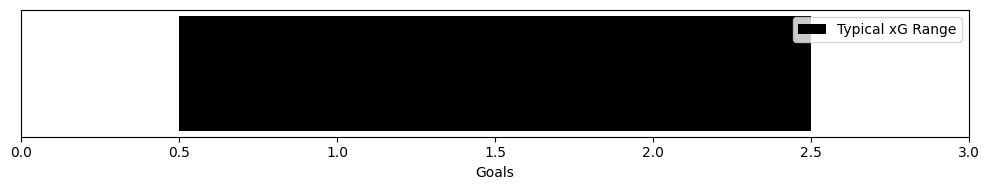

In [5]:
fig, ax = plt.subplots(figsize=(10, 2))

ax.barh(0, 3, color='white')
ax.barh(0, 2, left=0.5, color='black', label='Typical xG Range')
ax.set_xlim(0, 3)
ax.set_yticks([])
ax.set_xlabel("Goals")
ax.legend() 

plt.tight_layout()
plt.show()


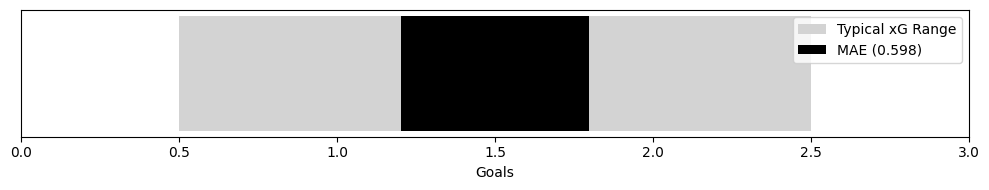

In [6]:
range_center = (0.5 + 2.5) / 2
fig, ax = plt.subplots(figsize=(10, 2))

ax.barh(0, 3, color='white')
ax.barh(0, 2, left=0.5, color='lightgrey', label='Typical xG Range')
ax.barh(0, mae2, left=range_center - mae2/2, color='black', label=f'MAE ({mae2:.3f})')
ax.set_xlim(0, 3)
ax.set_yticks([])
ax.set_xlabel("Goals")
ax.legend() 

plt.tight_layout()
plt.show()


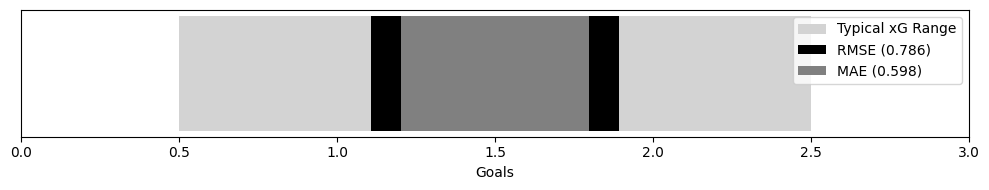

In [7]:
range_center = (0.5 + 2.5) / 2
fig, ax = plt.subplots(figsize=(10, 2))

ax.barh(0, 3, color='white')
ax.barh(0, 2, left=0.5, color='lightgrey', label='Typical xG Range')
ax.barh(0, rmse2, left=range_center - rmse2/2, color='black', label=f'RMSE ({rmse2:.3f})')
ax.barh(0, mae2, left=range_center - mae2/2, color='grey', label=f'MAE ({mae2:.3f})')

ax.set_xlim(0, 3)
ax.set_yticks([])
ax.set_xlabel("Goals")
ax.legend() 

plt.tight_layout()
plt.show()

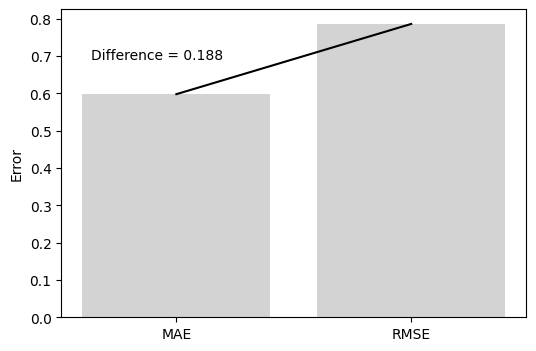

In [28]:
difference = rmse2 - mae2

fig, ax = plt.subplots(figsize=(6, 4))

plt.bar(['MAE', 'RMSE'], [mae2, rmse2], color='lightgrey')
plt.plot(['MAE', 'RMSE'], [mae2, rmse2], color='black')

plt.text(0.2, (mae2 + rmse2) / 2, f'Difference = {difference:.3f}', 
         ha='right')

plt.ylabel('Error')
plt.show()


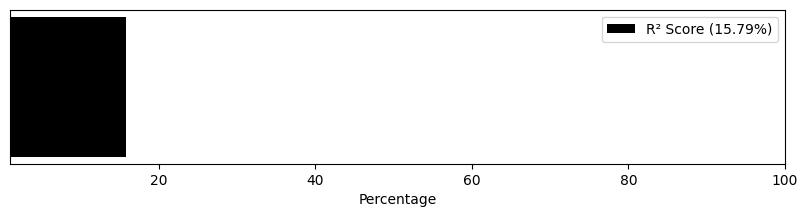

In [26]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.barh(["R² Score"], rscore2*100, color='black', label=f'R² Score ({rscore2*100:.2f}%)')
ax.set_xlim(1, 100)
plt.xlabel('Percentage')
ax.set_yticks([])

ax.legend()
plt.show()
